## Content
   ###     Load and preprocessing data
   ###     Linear Regressor: AdaBoostRegressor, DecisionTreesRegressor,GradientBoostingRegressor, BaggingRegressor
   ###     ARIMA (Autoregressive integrated moving average)
   ###     Prophet (Facebook opensource predictor)

# I. Load and preprocessing data

We do so,

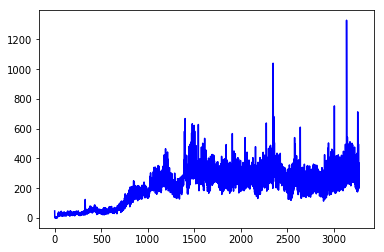

In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler
#from statsmodels.tsa.stattools import pacf,acf
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

with open('Trace_ArtsEntertainment_0.json') as f:
    dict = json.load(f)    

for kk, v in dict.items():
    if v['totalView'] < 1000000 and v['totalView'] > 600000:
    #if v['totalView'] < 600000 and v['totalView'] > 500000:
        viewCount = np.array(v['dailyViewcount'])
        k=kk
        plt.plot(viewCount, label = k, color = 'blue')
        plt.show()


In [14]:
lookBacktime = 1
X_train = []
y_train = []
for i in range(lookBacktime, len(viewCount)-int(0.1*len(viewCount))):
    X_train.append(viewCount[i-lookBacktime:i])
    y_train.append(viewCount[i])

X_train, y_train = np.array(X_train), np.array(y_train) 

print(X_train)

X_test = []
y_test = []
for i in range(len(viewCount)-int(0.1*len(viewCount)), len(viewCount)):
    X_test.append(viewCount[i-lookBacktime:i])
    y_test.append(viewCount[i])
    
X_test, y_test = np.array(X_test), np.array(y_test)  

[[ 47]
 [  4]
 [  1]
 ..., 
 [213]
 [327]
 [504]]


# II. Linear Regressors

## 1. AdaBoostRegressor

An example: http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py

Automatically created module for IPython interactive environment


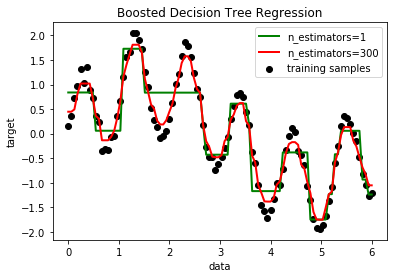

In [6]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

Now go to our problem:

running code:

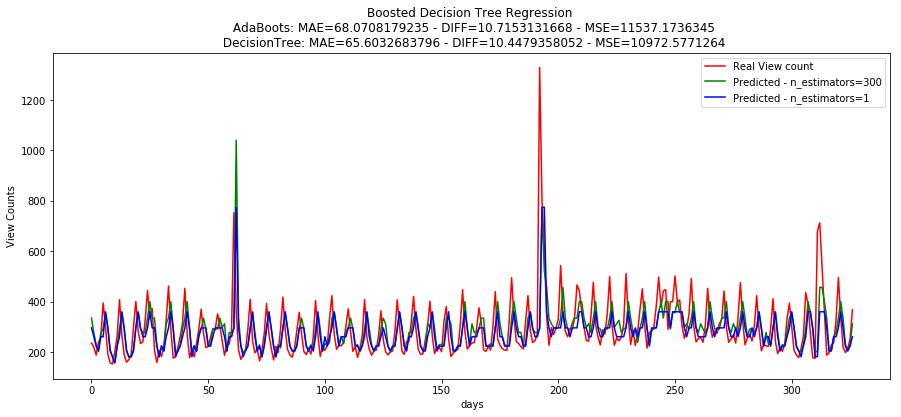

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

def cdf(data,bins=100):
    from numpy import histogram, cumsum
    pf,base = histogram(data,bins)
    return cumsum(pf)/len(data), base[:-1]

def mae_diff(a,b):
    import numpy as np
    denominator = np.abs(a) + np.abs(b)
    with np.errstate(divide='ignore', invalid='ignore'):
        d = np.true_divide(np.abs(a - b), denominator)
        d[denominator == 0] = 0
    return np.mean(np.abs(a-b)), np.mean(d)*100

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
n_est=300
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=n_est, random_state=rng)

# X_train, y_train
# X_test, y_test

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

mae_ada, diff_ada = mae_diff(y_test,y_2)
mse_ada = mean_squared_error(y_test, y_2)
mae_tree, diff_tree = mae_diff(y_test,y_1)
mse_tree = mean_squared_error(y_test, y_1)

# Plot the results
plt.figure(figsize=[15,6])
plt.plot(y_test, color = 'red', label = 'Real View count')
plt.plot(y_2, color = 'g', label = 'Predicted - n_estimators=' + str(n_est))
plt.plot(y_1, color = 'blue', label = 'Predicted - n_estimators=1')
plt.xlabel("days")
plt.ylabel("View Counts")
plt.title("Boosted Decision Tree Regression \n AdaBoots: MAE=" + str(mae_ada) \
          + " - DIFF=" + str(diff_ada) + " - MSE=" + str(mse_ada) + "\n DecisionTree: MAE=" + str(mae_tree) \
          + " - DIFF=" + str(diff_tree) + " - MSE=" + str(mse_tree))
plt.legend()
plt.show()


## 2. Gradient Boosting Regression Random Forest Regressor

 example:
 - http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py
 - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

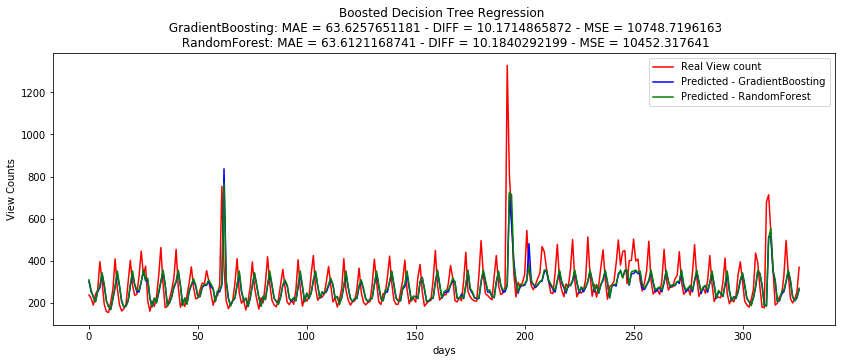

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

def cdf(data,bins=100):
    from numpy import histogram, cumsum
    pf,base = histogram(data,bins)
    return cumsum(pf)/len(data), base[:-1]

def mae_diff(a,b):
    import numpy as np
    denominator = np.abs(a) + np.abs(b)
    with np.errstate(divide='ignore', invalid='ignore'):
        d = np.true_divide(np.abs(a - b), denominator)
        d[denominator == 0] = 0
    return np.mean(np.abs(a-b)), np.mean(d)*100

# Fit regression model
params = {'n_estimators': 300, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))

regr = ensemble.RandomForestRegressor(n_estimators=20, max_depth= 4, random_state=0)
regr.fit(X_train, y_train)
mse_randfor = mean_squared_error(y_test, regr.predict(X_test))


# X_train, y_train
# X_test, y_test


# Predict
y_1 = clf.predict(X_test)
mae_grad, diff_grad = mae_diff(y_test,y_1)

y_2 = regr.predict(X_test)
mae_randfor, diff_randfor = mae_diff(y_test,y_2)

# Plot the results
plt.figure(figsize=[14,5])
plt.plot(y_test, color = 'red', label = 'Real View count')
plt.plot(y_1, color = 'blue', label = 'Predicted - GradientBoosting')
plt.plot(y_2, color = 'g', label = 'Predicted - RandomForest')
plt.xlabel("days")
plt.ylabel("View Counts")
plt.title("Boosted Decision Tree Regression \n GradientBoosting: MAE = " + str(mae_grad) \
          + " - DIFF = " + str(diff_grad) + " - MSE = " + str(mse) \
          + "\n RandomForest: MAE = " + str(mae_randfor) \
          + " - DIFF = " + str(diff_randfor) + " - MSE = " + str(mse_randfor) )
plt.legend()
plt.show()


# II. ARIMA (Autoregressive integrated moving average)

Reference: 
- https://www.kaggle.com/zoupet/predictive-analysis-with-different-approaches
- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/ (good reference for ARIMA). 
- http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
- https://datascience.ibm.com/exchange/public/entry/view/815137c868b916821dec777bdc23013c 


## 1. Test Stationary

Test if our data it is autoregressive process: (https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test)

/home/nhannguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  import sys
/home/nhannguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


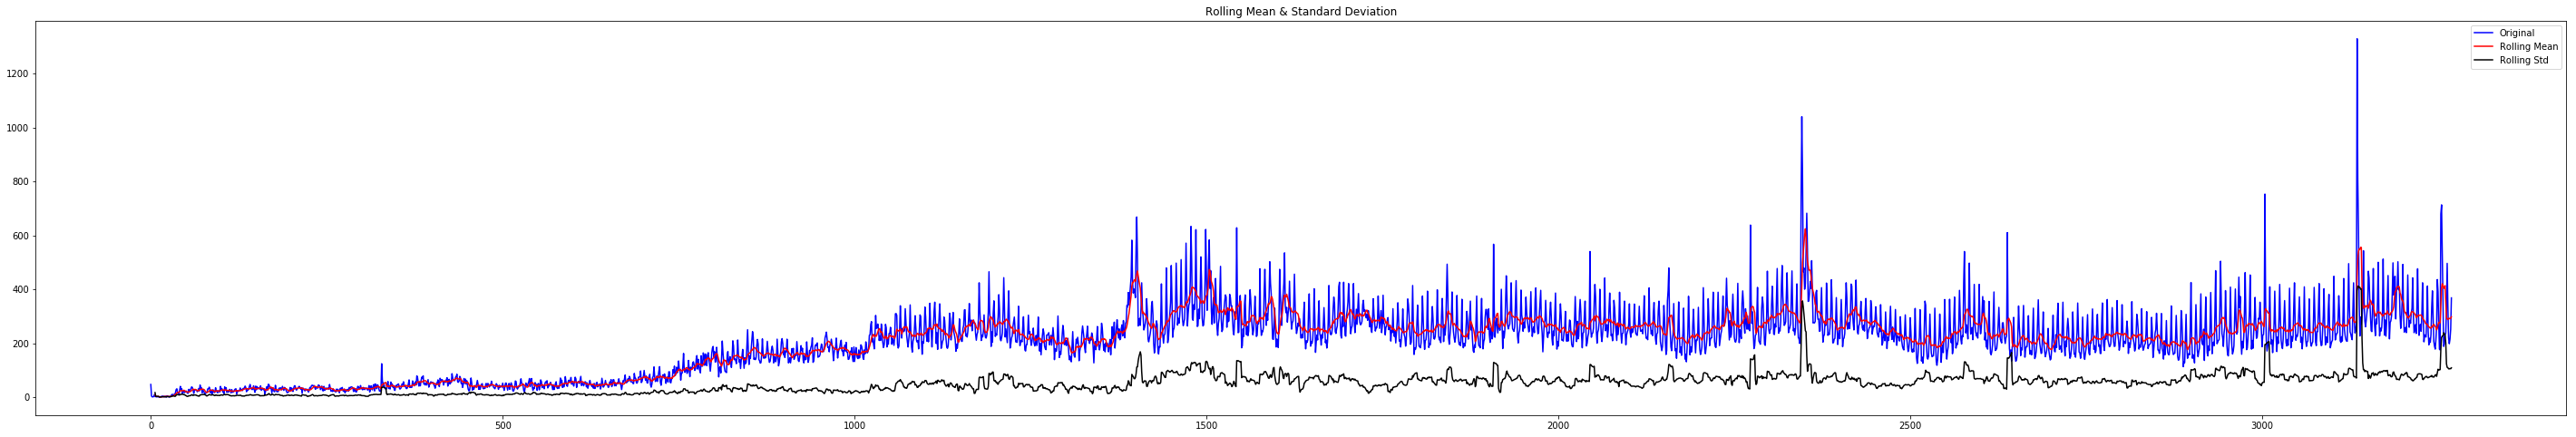

Results of Dickey-Fuller Test:
(-2.3994035928841684, 0.14190481095030472, 29, 3240, {'1%': -3.4323699038367206, '5%': -2.8624324724087438, '10%': -2.5672450823997868}, 33641.715395044404)
Test Statistic                   -2.399404
p-value                           0.141905
#Lags Used                       29.000000
Number of Observations Used    3240.000000
Critical Value (1%)              -3.432370
Critical Value (5%)              -2.862432
Critical Value (10%)             -2.567245
dtype: float64


In [23]:
import pandas as pd
import statsmodels.api as sm

def test_stationarity(timeseries):
    plt.figure(figsize=(50, 8))
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=7)
    rolstd = pd.rolling_std(timeseries, window=7)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries, autolag='AIC')
    print(dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(viewCount)   

Because the test statistic is more than the 5% critical value and the p-value is larger than 0.05, the moving average is not constant over time and the null hypothesis of the Dickey-Fuller test cannot be rejected. This shows that the time series is not stationary.
Before you can apply ARIMA models for forecasting, you need to transform this time series into a stationary time series.

## 2. Stationarize the time series
If your time series reveals a trend or seasonality, this is an indication that it is non-stationary. You can stationarize the time series by calculating the trend and seasonality and removing these factors from the model. You can apply different transformations to stationarize your data as seen in this list: http://people.duke.edu/~rnau/whatuse.htm

###  2.1. Apply a nonlinear log transformation

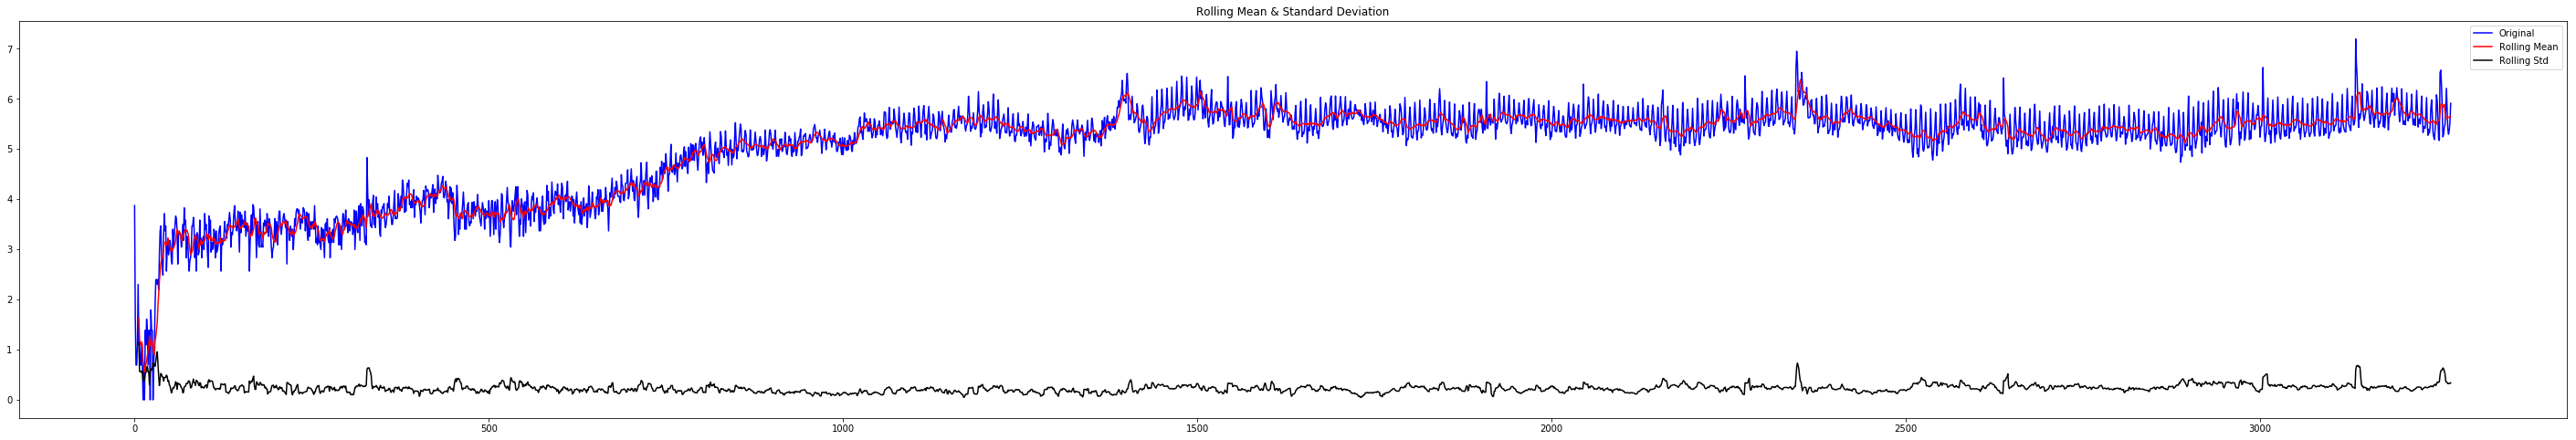

Results of Dickey-Fuller Test:
(-5.181630746557099, 9.5839045809317794e-06, 29, 3240, {'1%': -3.4323699038367206, '5%': -2.8624324724087438, '10%': -2.5672450823997868}, -1819.8368983540577)
Test Statistic                   -5.181631
p-value                           0.000010
#Lags Used                       29.000000
Number of Observations Used    3240.000000
Critical Value (1%)              -3.432370
Critical Value (5%)              -2.862432
Critical Value (10%)             -2.567245
dtype: float64


In [72]:
import warnings
warnings.filterwarnings('ignore')

viewCount_log = np.log(viewCount+1) # add 1 because of zero view
test_stationarity(viewCount_log)

p-value < 0.05 and Test Statistic < 0 => Stationary. But we have add an offset value (1) to ignore taking log of 0

### 2.2. Remove trend and seasonality with decomposition

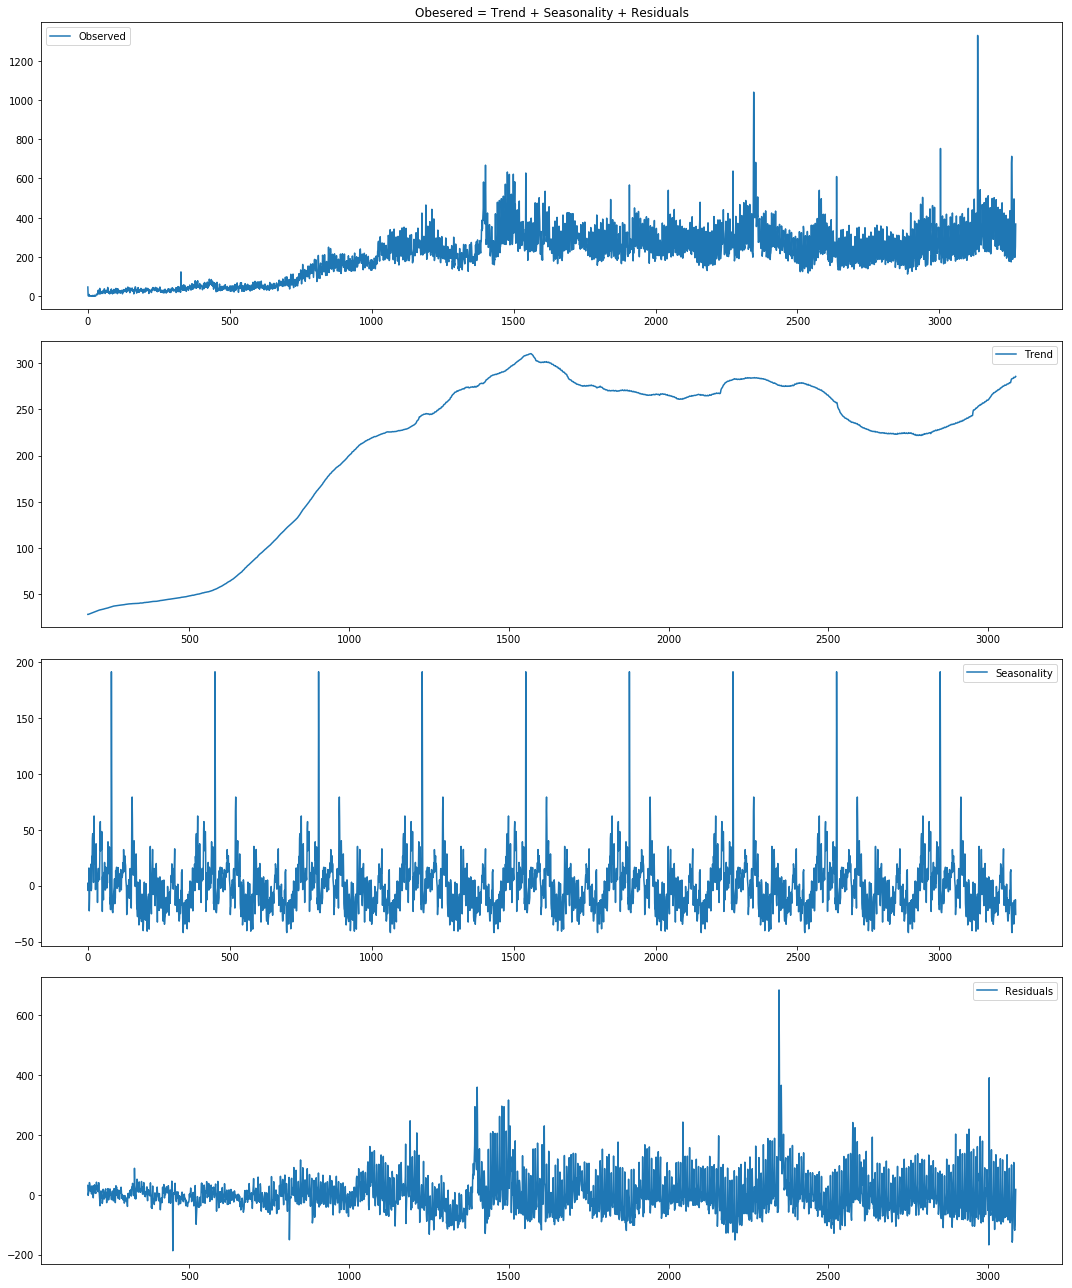

In [24]:
# Naive decomposition of our Time Series as explained above
decomposition = sm.tsa.seasonal_decompose(viewCount, model='additive',freq = 365) #7, 30, 365

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(15, 18))
plt.subplot(411)
plt.title('Obesered = Trend + Seasonality + Residuals')
plt.plot(viewCount, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 2.3. Remove trend and seasonality with differencing

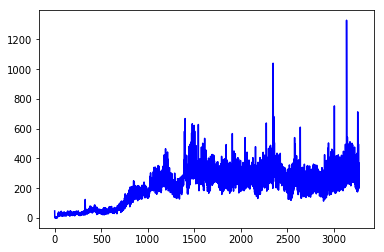

Printing Predicted vs Expected Values...




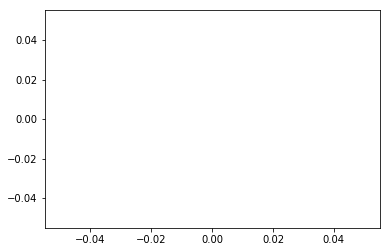

In [7]:
# ref: https://machinelearningmastery.com/make-sample-forecasts-arima-python/

import numpy as np
import json
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
#from sklearn.preprocessing import MinMaxScaler
#from statsmodels.tsa.stattools import pacf,acf
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#====================================================
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
        return np.array(diff)
#====================================================
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
#====================================================

with open('Trace_ArtsEntertainment_0.json') as f:
    dict = json.load(f)    

for kk, v in dict.items():
    if v['totalView'] < 1000000 and v['totalView'] > 600000:
    #if v['totalView'] < 600000 and v['totalView'] > 500000:
        viewCount = np.array(v['dailyViewcount'])
        k=kk
        plt.plot(viewCount, label = k, color = 'blue')
        plt.show()
#====================================================
ts = viewCount.astype('float64')

split_point = len(ts) - int(0.33*len(viewCount))
#dataset, validation = ts[0:split_point], ts[split_point:]

X= ts
days_in_year = 365
differenced = difference(X, days_in_year)

## fit model
#model = ARIMA(differenced, order=(2,0,4))
#model_fit = model.fit(disp=0)
## multi-step out-of-sample forecast
#start_index = len(differenced)
#end_index = start_index + 6
#forecast = model_fit.predict(start=start_index, end=end_index)
# #forecast = model_fit.forecast(steps=7)[0]
## invert the differenced forecast to something usable
#history = [x for x in X]
#day = 1
#for yhat in forecast:
#    inverted = inverse_difference(history, yhat, days_in_year)
#    print('Day %d: %f' % (day, inverted))
#    history.append(inverted)
#    day += 1





train, test = differenced[0:split_point], differenced[split_point:]
history = [x for x in train]
predictions = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,4))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    inverted = inverse_difference(history, yhat, days_in_year)
    predictions.append(float(inverted))
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (np.exp(inverted), np.exp(obs)))


    #error = mean_squared_error(test, predictions)
plt.plot(predictions)
plt.plot(test)
plt.show() 
#print('\n')
#print('Printing Mean Squared Error of Predictions...')
#print('Test MSE: %.6f' % error)

#predictions_series = pd.Series(predictions, index = test.index)

#############################################""





... in processing: it seems that we do not success in implementing ARIMA by differencing techniques

Link for example of over fitting ARIMA
http://kourentzes.com/forecasting/2016/11/29/the-difference-between-in-sample-fit-and-forecast-performance/


AIC : http://kourentzes.com/forecasting/2016/06/17/how-to-choose-a-forecast-for-your-time-series/

## Estimating ARIMA parameter by ACF and PACF

The predictors depend on the parameters (p,d,q) of the ARIMA model:

- Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.


An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

- Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
- Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

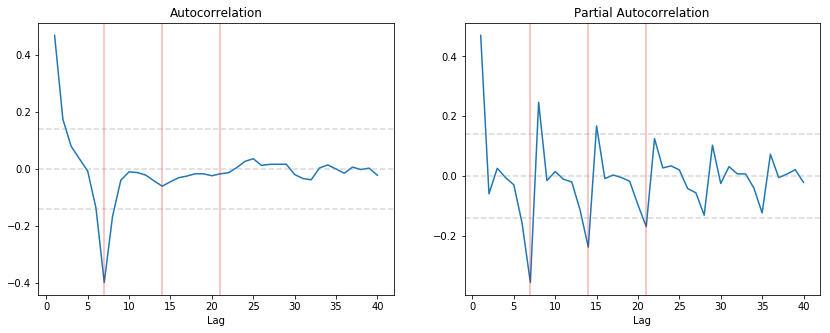

In [18]:
from statsmodels.tsa.stattools import pacf,acf
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = viewCount
data_diff = [data[i] - data[i-7] for i in range(7,len(data))]
autocorr = acf(data_diff)
pac = pacf(data_diff)

fig = plt.figure(10,figsize=[14,5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
 
x = [x for x in range(len(pac))]
ax1.plot(x[1:],autocorr[1:])
ax1.axvline(x=7,color='red',alpha=0.3,label = '7 days')
ax1.axvline(x=14,color='red',alpha=0.3)
ax1.axvline(x=21,color='red',alpha=0.3)

ax1.axhline(y=0,linestyle='--',alpha=0.3, color='gray')
ax1.axhline(y=-7.96/np.sqrt(len(data_diff)),linestyle='--',alpha=0.3,color='gray')
ax1.axhline(y=7.96/np.sqrt(len(data_diff)),linestyle='--',alpha=0.3,color='gray')
        
ax2.plot(x[1:],pac[1:])
ax2.axvline(x=7,color='red',alpha=0.3,label = '7 days')
ax2.axvline(x=14,color='red',alpha=0.3,label = '14 days')
ax2.axvline(x=21,color='red',alpha=0.3,label = '21 days')

ax2.axhline(y=0,linestyle='--',alpha=0.3,color='gray')
ax2.axhline(y=-7.96/np.sqrt(len(data_diff)),linestyle='--',alpha=0.3,color='gray')
ax2.axhline(y=7.96/np.sqrt(len(data_diff)),linestyle='--',alpha=0.3,color='gray')
        



ax1.set_xlabel('Lag')
ax1.set_title('Autocorrelation')
ax2.set_xlabel('Lag')
ax2.set_title('Partial Autocorrelation')
plt.show()

#plot_acf(data)
#plt.show()
#plot_pacf(data, lags=7)
#plt.show()
        

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the lower (upper) confidence interval for the first time. If you notice closely, in this case p=2.
q – The lag value where the ACF chart crosses the lower (upper) confidence interval for the first time. If you notice closely, in this case q=2.

%%%Now, lets make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3270
Model:                     ARMA(2, 4)   Log Likelihood              -17780.870
Method:                       css-mle   S.D. of innovations             55.599
Date:                Fri, 10 Nov 2017   AIC                          35577.740
Time:                        14:16:53   BIC                          35626.480
Sample:                             0   HQIC                         35595.195
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.7670     44.987      4.374      0.000     108.594     284.940
ar.L1.y        1.4015      0.047     29.704      0.000       1.309       1.494
ar.L2.y       -0.4033      0.047     -8.563      0.0

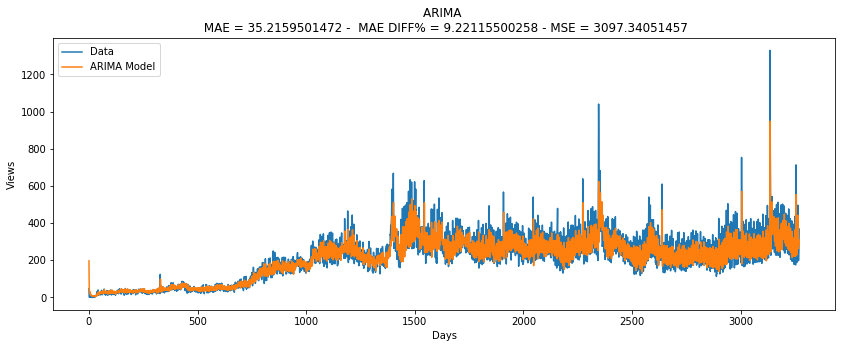

In [21]:
from sklearn.metrics import mean_squared_error

def cdf(data,bins=100):
    from numpy import histogram, cumsum
    pf,base = histogram(data,bins)
    return cumsum(pf)/len(data), base[:-1]

def mae_diff(a,b):
    import numpy as np
    denominator = np.abs(a) + np.abs(b)
    with np.errstate(divide='ignore', invalid='ignore'):
        d = np.true_divide(np.abs(a - b), denominator)
        d[denominator == 0] = 0
    return np.mean(np.abs(a-b)), np.mean(d)*100

lookBacktime = 6
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(lookBacktime, len(viewCount)-int(0.33*len(viewCount))):
    X_train.append(viewCount[i-lookBacktime:i])
    y_train.append(viewCount[i])
    X_test.append(viewCount[i-lookBacktime:i])
    y_test.append(viewCount[i])

X_train, y_train = np.array(X_train), np.array(y_train)   
X_test, y_test = np.array(X_test), np.array(y_test)  

from statsmodels.tsa.arima_model import ARIMA
data = viewCount.astype('float64')# X_train.astype('float64')
arima = ARIMA(data,[2,0,4])#(data,[7,0,2])
result = arima.fit(disp=-1)

print (result.summary())
#predict_test = 

mse_arima = mean_squared_error(data, result.fittedvalues)#(y_train, result.fittedvalues)
mae_arima, diff_arima = mae_diff(data, result.fittedvalues)

plt.figure(figsize=[14,5])
plt.plot(viewCount, label='Data') 
plt.plot(result.fittedvalues,label='ARIMA Model')
plt.xlabel('Days')
plt.ylabel('Views')
plt.legend()
plt.title("ARIMA \n MAE = " + str(mae_arima) \
          + " -  MAE DIFF% = " + str(diff_arima) + " - MSE = " + str(mse_arima))
plt.show()

Notice that this result is only train prediction; for validation prediction we need to do more by two approach: i) forecast with a period, ii) forecast by day with daily update

# III. PROPHET

## 1. Learn

Installation: https://facebook.github.io/prophet/docs/installation.html 

Example: https://facebook.github.io/prophet/docs/quick_start.html#python-api

- a time series of daily page views for the Wikipedia page for Peyton Manni

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

df = pd.read_csv('example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206753,7.473831,8.887341
3266,2017-01-16,8.531766,7.754828,9.214445
3267,2017-01-17,8.319156,7.606987,9.063905
3268,2017-01-18,8.151772,7.440452,8.928288
3269,2017-01-19,8.163690,7.411250,8.863836


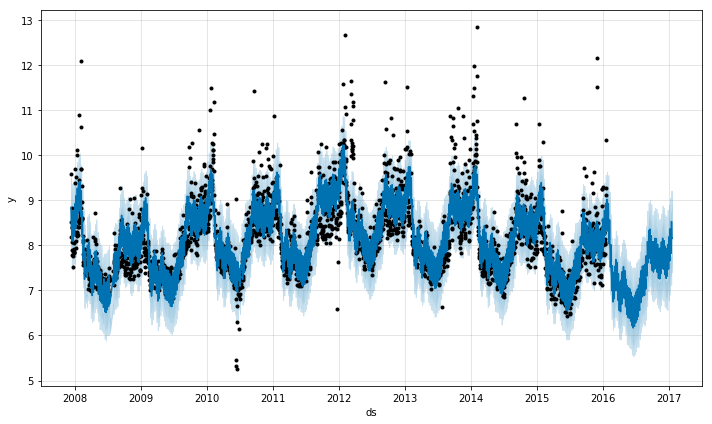

In [15]:
m.plot(forecast);
plt.show()

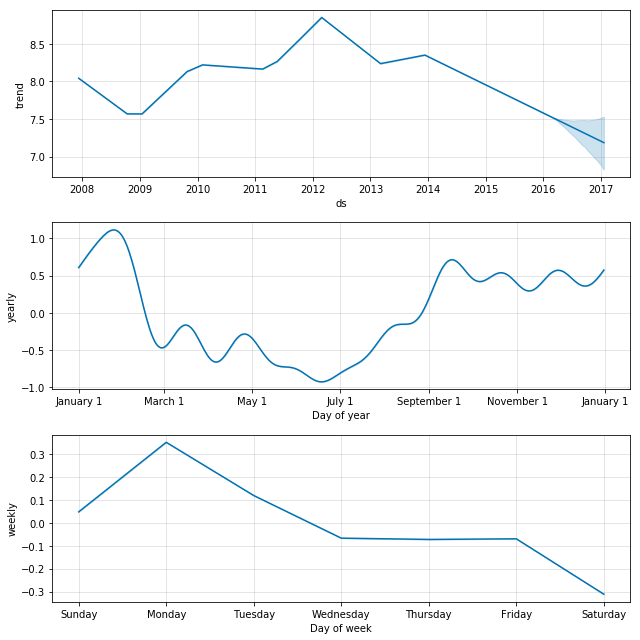

In [16]:
m.plot_components(forecast);
plt.show()

## 2. Our problem 

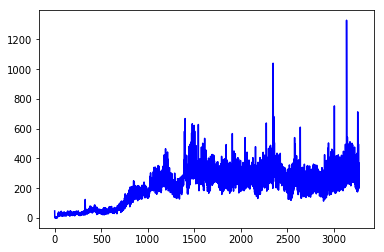

In [18]:
# Load DATA
import numpy as np
import json
import matplotlib.pyplot as plt
from fbprophet import Prophet

with open('Trace_ArtsEntertainment_0.json') as f:
    dict = json.load(f)    

for kk, v in dict.items():
    if v['totalView'] < 1000000 and v['totalView'] > 600000:
    #if v['totalView'] < 600000 and v['totalView'] > 500000:
        viewCount = np.array(v['dailyViewcount'])
        k=kk
        plt.plot(viewCount, label = k, color = 'blue')
        plt.show()
#====================================================
ts = viewCount.astype('float64')

split_point = len(ts) - int(0.33*len(viewCount))
dataset, validation = ts[0:split_point], ts[split_point:]

### preparing data: convert dictionary to pandas dataframe

In [32]:
import pandas as pd
import numpy as np
import json
from datetime import date, timedelta
import matplotlib.pyplot as plt
from fbprophet import Prophet

def datetime_span(start, span):
    allDay = list()
    for i in range(span):
        allDay.append(start + timedelta(days=i))
    return allDay

with open('Trace_ArtsEntertainment_0.json') as f:
    dict = json.load(f)

pdata ={}        
for kk, v in dict.items():
    start = date(v['uploadYear'],v['uploadMonth'],v['uploadDay'])
    allDay = datetime_span(start,len(v['dailyViewcount']))
    pdata[kk] = pd.DataFrame(
            {'ds': allDay,
             'y': v['dailyViewcount']
             })
    # get our video we want to test
    if v['totalView'] < 1000000 and v['totalView'] > 600000:
        df = pdata[kk]
# df['viewCount'] = np.log(df['viewCount']) # can not utilize because of zero view
df.head()        

,ds,y
0,2008-10-10,47
1,2008-10-11,4
2,2008-10-12,1
3,2008-10-13,1
4,2008-10-14,2


### now go to prophet

In [27]:
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3630,2018-09-18
3631,2018-09-19
3632,2018-09-20
3633,2018-09-21
3634,2018-09-22


In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3630,2018-09-18,322.998883,232.495758,408.538645
3631,2018-09-19,326.162266,234.405985,416.108451
3632,2018-09-20,337.632946,247.332758,434.568248
3633,2018-09-21,375.416527,287.060693,463.071106
3634,2018-09-22,436.884843,341.720640,526.743407


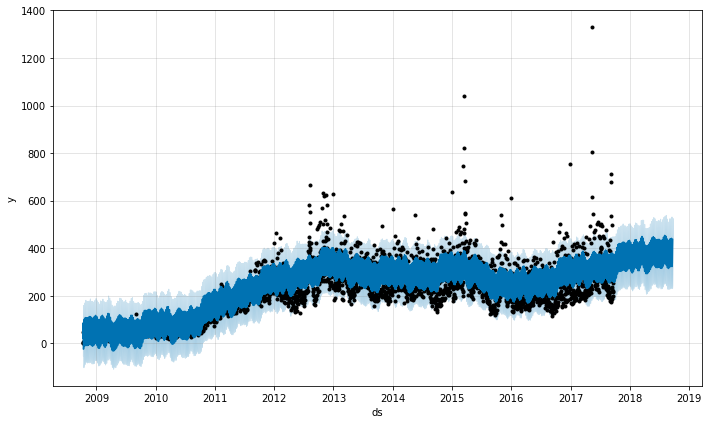

In [30]:
m.plot(forecast);
plt.show()

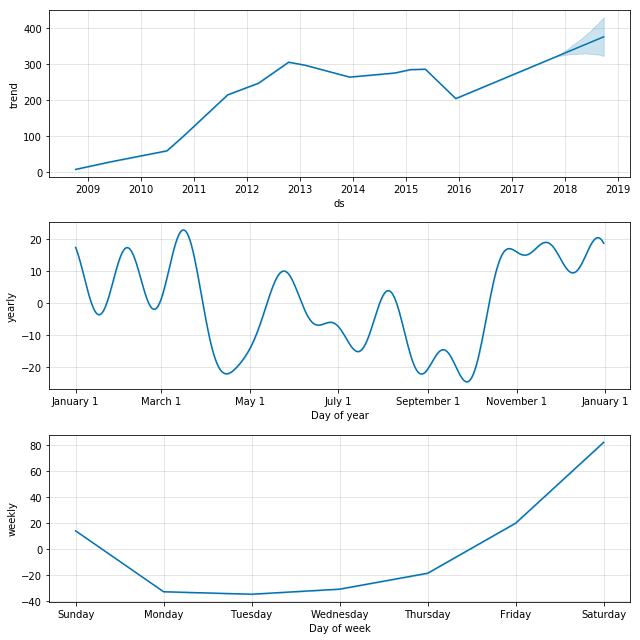

In [31]:
m.plot_components(forecast);
plt.show()

### prophet with split data for evalutation

In [41]:
#from sklearn.model_selection import train_test_split #=> it shuffle our data: cannot use
#train, test = train_test_split(df, test_size=0.2)

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size,:], df.iloc[train_size:len(df),:]
print(len(train), len(test))


2616 654


Do training again:

In [42]:
m = Prophet()
m.fit(train);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = m.make_future_dataframe(len(test))
future.tail()

,ds
3265,2017-09-18
3266,2017-09-19
3267,2017-09-20
3268,2017-09-21
3269,2017-09-22


In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-09-18,217.664495,114.039733,331.005353
3266,2017-09-19,215.776455,104.150213,332.277200
3267,2017-09-20,219.116696,108.279076,335.812003
3268,2017-09-21,225.392507,108.057357,331.533804
3269,2017-09-22,259.732921,145.718774,374.129871


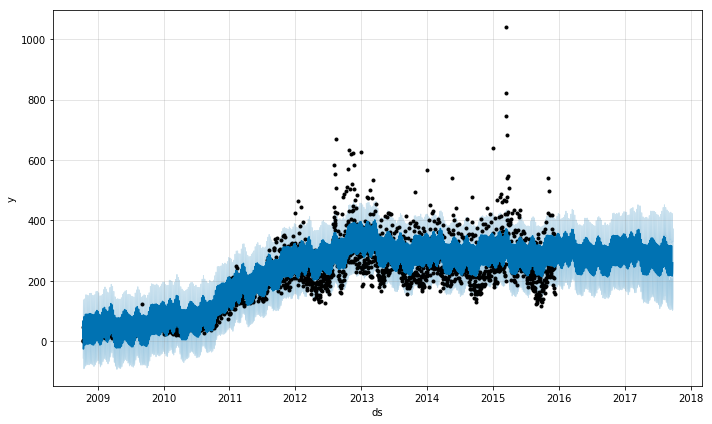

In [45]:
m.plot(forecast);
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error

def mae_diff(a,b):
    import numpy as np
    denominator = np.abs(a) + np.abs(b)
    with np.errstate(divide='ignore', invalid='ignore'):
        d = np.true_divide(np.abs(a - b), denominator)
        d[denominator == 0] = 0
    return np.mean(np.abs(a-b)), np.mean(d)*100

realValues=test.y.values
predictValues=forecast.yhat.iloc[-len(test):].values
mae, diff = mae_diff(realValues,predictValues)
mse = mean_squared_error(realValues,predictValues)

print('MAE=' + str(mae) + '- DIFF=' + str(diff) + ' - MSE=' +str(mse))


MAE=57.7308554533- DIFF=10.9866441765 - MSE=7602.48282073


Notice that this result is obtained by predicting for long term. It will be better if we use daily updating process